# NLP (Natural Language Processing) - Project 2

## SPAM vs HAM

In [80]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from os import path
import sys
sys.path.append(path.abspath('../Functions'))

size=15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)

#Download the necessary datasets
#We want the stopwords package
#nltk.download_shell()

## The Dataset

We'll use a dataset from the [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection).
Go to the website for more details.

Our dataset contains more than 5 thousand SMS phone messages classified as ham (legitimate) or spam.

In [2]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print(len(messages))

5574


Let's print and enumerate the first ten messages.

In [3]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

This is a [TSV](http://en.wikipedia.org/wiki/Tab-separated_values) ("tab separated values") file, where the first column is a label saying whether the given message is a normal message (commonly known as "ham") or "spam". The second column is the message itself. **The messages are not numerated! The numbers came form the enumerate command in the for loop.**

The idea of the project is to use Machine Learning to discriminate between spam and ham. 

## Creating the dataframe

In [5]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

In [6]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


**Nothing much to see with describe, since the dataframe does not have numeric features. We have 5572 messages, with 2 unique labels (spam or ham). We have more ham messages than spam messages.**

We can apply the describe method to each label.

In [7]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

We have 4825 ham messages and almost all of them are unique, while we have 747 spam messages.

Let's make a new column to detect how long the text messages are:

In [8]:
messages['length'] = messages['message'].apply(len)
messages.sort_values('length',ascending=False).head()

,label,message,length
1085,ham,For me the love should start with attraction.i...,910
1863,ham,The last thing i ever wanted to do was hurt yo...,790
2434,ham,Indians r poor but India is not a poor country...,629
1579,ham,How to Make a girl Happy? It's not at all diff...,611
2158,ham,Sad story of a Man - Last week was my b'day. M...,588


In [9]:
messages.sort_values('length',ascending=True).head()

,label,message,length
4498,ham,Ok,2
3051,ham,Ok,2
1925,ham,Ok,2
5357,ham,Ok,2
3833,ham,Ok.,3


## Data Visualization

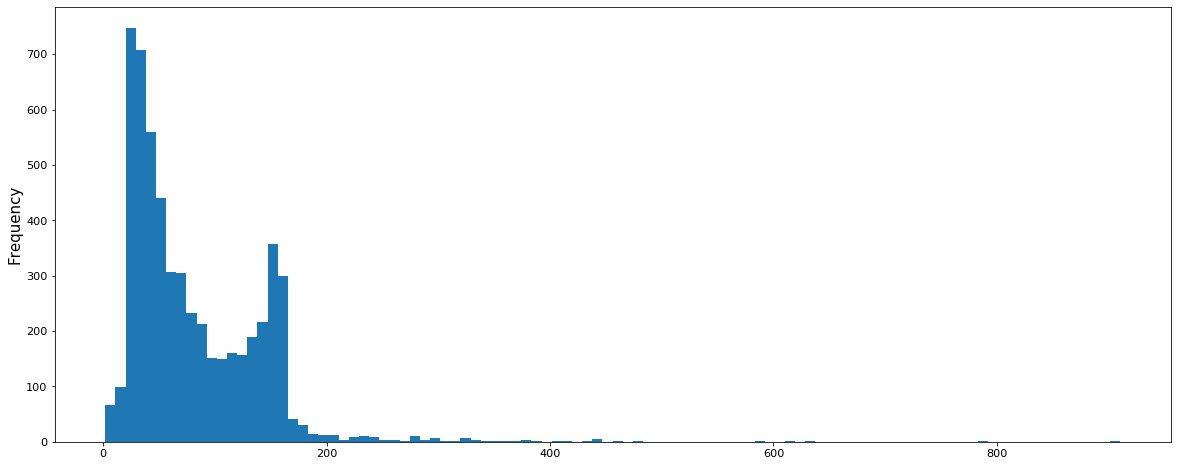

In [32]:
messages['length'].plot(bins=100, kind='hist');

We have very long messages, but few of them.

In [39]:
messages.sort_values('length',ascending=False).head()

,label,message,length
1085,ham,For me the love should start with attraction.i...,910
1863,ham,The last thing i ever wanted to do was hurt yo...,790
2434,ham,Indians r poor but India is not a poor country...,629
1579,ham,How to Make a girl Happy? It's not at all diff...,611
2158,ham,Sad story of a Man - Last week was my b'day. M...,588


In [40]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

The longest message has length 910, the second one has length 790. Let's see the longest message.

In [41]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Definitely not a spam.

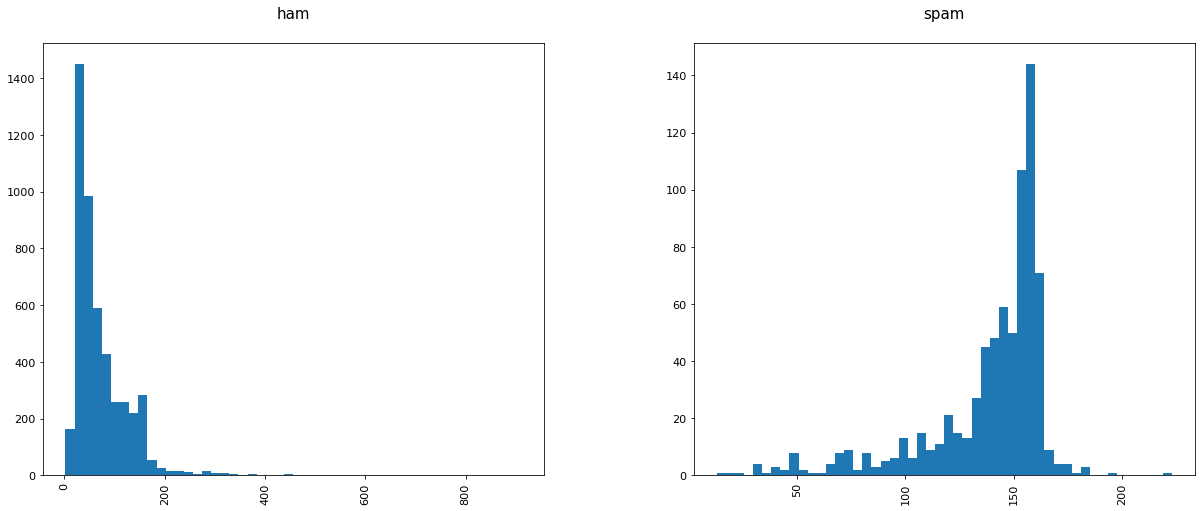

In [44]:
messages.hist(column='length', by='label', bins=50);

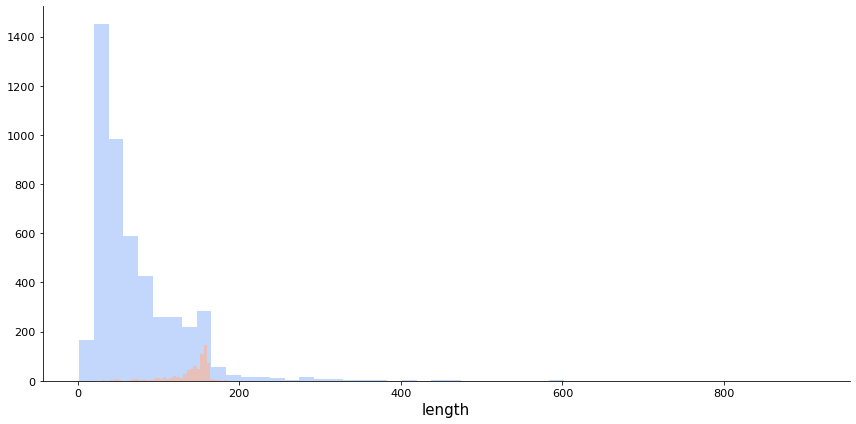

In [49]:
g = sns.FacetGrid(messages,hue='label',aspect=2,height=6,palette='coolwarm')
g.map(plt.hist,'length',bins=50,alpha=0.7);

It seems that SPAM messages have a peak in length around 150, while legitimate SMS messages are shorter. Also, the very long messages are legitimate. 
We can think of it this way: 
- Legitimate messages are part of a conversation so it seems reasonable that most of them are short.
- SPAM messages have to convey an idea or propaganda, and that requires the message to have a longer length.
- A very long SPAM message would probably cost more money to send.
- A very long message conveys a lot of ideas or feelings, as we have seen in the case of the 910 length message.

## Text Pre-processing

We have a dataframe comprised of messages, in the form of string. Let's convert the raw messages (sequence of characters) into vectors (sequences of numbers). This way we can use Machine Learning models more easily.

Tasks to perform:

1) Remove punctuation.
2) Split a message into its individual words and return a list. 
3) Remove very common words, ('the', 'a', etc..). To do this we will take advantage of the NLTK library.

In [50]:
import string
from nltk.corpus import stopwords

def text_process(input_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check punctuation
    nopunc = [char for char in input_text if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

Checking the dataframe

In [52]:
messages.head(10)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154


Let's apply the function:

In [53]:
# Check to make sure its working
messages['message'].head(10).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
5    [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6    [Even, brother, like, speak, treat, like, aids...
7    [per, request, Melle, Melle, Oru, Minnaminungi...
8    [WINNER, valued, network, customer, selected, ...
9    [mobile, 11, months, U, R, entitled, Update, l...
Name: message, dtype: object

## Vectorization

Now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (term frequency - TF)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency - IDF)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocabulary words
print(len(bow_transformer.vocabulary_))

11425


Let's take one text message and get its bag-of-words counts as a vector, putting to use our new `bow_transformer`:

In [59]:
message7 = messages['message'][6]
print(message7)

Even my brother is not like to speak with me. They treat me like aids patent.


Now let's see its vector representation:

In [61]:
bow7 = bow_transformer.transform([message7])
print(bow7)
print(bow7.shape)

  (0, 1802)	1
  (0, 4590)	1
  (0, 5193)	1
  (0, 7800)	2
  (0, 8761)	1
  (0, 9971)	1
  (0, 10629)	1
(1, 11425)


This means that there are seven unique words in message number 7 (after removing common stop words). One of them appear twice, the rest only once. Let's go ahead and check and confirm which one appear twice:

In [62]:
print(bow_transformer.get_feature_names()[7800])

like


Now we can use **.transform** on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages.

In [63]:
messages_bow = bow_transformer.transform(messages['message'])

In [64]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [65]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


## TF-IDF

In [66]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf7 = tfidf_transformer.transform(bow7)
print(tfidf7)

  (0, 10629)	0.3352766696931058
  (0, 9971)	0.3268691780062757
  (0, 8761)	0.43700993321905807
  (0, 7800)	0.41453906826037096
  (0, 5193)	0.33843411088434017
  (0, 4590)	0.43700993321905807
  (0, 1802)	0.3352766696931058


We'll go ahead and check what is the IDF (inverse document frequency) of the word `"like"` and of word `"brother"`?

In [68]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['like']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['brother']])

4.236617057753035
6.917638586467326


To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [69]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


## Training a model

In [70]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

Let's try classifying our single random message and checking how we do:

In [72]:
print('predicted:', spam_detect_model.predict(tfidf7)[0])
print('expected:', messages.label[6])

predicted: ham
expected: ham


## Train Test Split

In [75]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print('Size of training set: ',len(msg_train))
print('Size of testing set: ', len(msg_test))

Size of training set:  4457
Size of testing set:  1115


## Creating a Data Pipeline

In [76]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Now we can directly pass message text data and the pipeline will do our pre-processing.

In [77]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fee6bfa4268>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [78]:
predictions = pipeline.predict(msg_test)

In [81]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1011
        spam       0.73      1.00      0.85       104

    accuracy                           0.97      1115
   macro avg       0.87      0.98      0.91      1115
weighted avg       0.98      0.97      0.97      1115



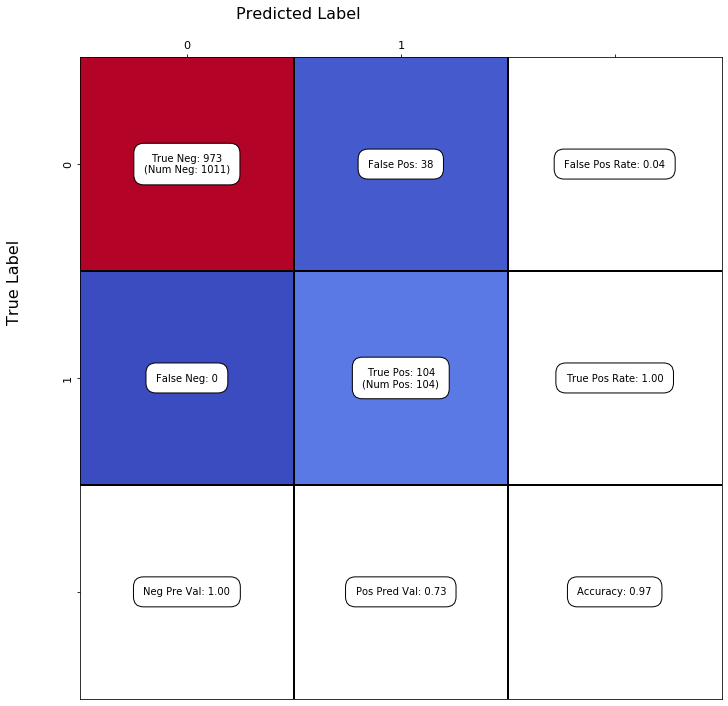

In [83]:
from smc import show_confusion_matrix
C = confusion_matrix(predictions,label_test)
show_confusion_matrix(C)